![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/766/14ef10da78a568e6e546.jpg)


# Getting Started Code for [Space Debris Challenge](//www.aicrowd.com/challenges/space-debris) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [4]:
# Installing TOrch
# !pip install pyyaml==5.1
# !pip install torch==1.7.1 torchvision==0.8.2
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version

%pip install pyyaml torch torchvision
!CC=clang CXX=clang++ ARCHFLAGS="-arch x86_64" python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\bello\AppData\Local\Temp\pip-req-build-51wm8cfh'



  Cloning https://github.com/facebookresearch/detectron2.git to c:\users\bello\appdata\local\temp\pip-req-build-51wm8cfh
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9131ce0e5bc0c89904541bc0355d933ccd6acbfb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
     ---------------------------------------- 0.0/50.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/50.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/50.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/50.2 kB ? eta -:--:--
     ------------------------------ ------- 41.0/50.2 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 50.2/50.2 kB 319.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finish

In [2]:
import sys, os, distutils.core
from IPython.display import clear_output

!python -m pip install pyyaml==5.1
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))
clear_output()

     ---------------------------------------- 0.0/274.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/274.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/274.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/274.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/274.2 kB ? eta -:--:--
     ---- -------------------------------- 30.7/274.2 kB 186.2 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/274.2 kB 195.7 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/274.2 kB 195.7 kB/s eta 0:00:02
     ----------- ------------------------- 81.9/274.2 kB 286.7 kB/s eta 0:00:01
     -------------- --------------------- 112.6/274.2 kB 363.1 kB/s eta 0:00:01
     -------------------------------- --- 245.8/274.2 kB 684.7 kB/s eta 0:00:01
     ------------------------------------ 274.2/274.2 kB 733.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py)

Cloning into 'detectron2''...
fatal: protocol ''https' is not supported


FileNotFoundError: [Errno 2] No such file or directory: './detectron2/setup.py'

In [16]:
# # Installing Detectron2
# import torch
# assert torch.__version__.startswith("1.7")
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.

Please enter your API Key from [https://www.aicrowd.com/participants/me]

In [17]:
# !rm -rf data
# !mkdir data

# !unzip train.zip -d data/train > /dev/null

# !unzip val.zip -d data/val > /dev/null

# !unzip test.zip -d data/test > /dev/null

# !mv train.csv data/train.csv
# !mv val.csv data/val.csv


## Import packages

In [2]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

import pandas as pd
import numpy as np
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
import random
from ast import literal_eval

matplotlib data path: /Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/matplotlib/mpl-data
CONFIGDIR=/Users/kylewigdor/.matplotlib
interactive is False
platform is darwin
CACHEDIR=/Users/kylewigdor/.matplotlib
Using fontManager instance from /Users/kylewigdor/.matplotlib/fontlist-v390.json


## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [3]:
data_path = "./debris-detection"
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
val_df = pd.read_csv(os.path.join(data_path, "val.csv"))

## Visualize the data 👀

In [20]:
train_df

ImageID                                             bboxes
0            0  [[282, 308, 58, 86], [228, 256, 191, 218], [10...
1            1  [[97, 127, 297, 332], [315, 352, 136, 168], [7...
2            2  [[45, 76, 244, 269], [154, 182, 457, 484], [20...
3            3  [[252, 282, 86, 110], [315, 333, 379, 412], [2...
4            4  [[175, 203, 406, 440], [57, 86, 433, 464], [26...
...        ...                                                ...
19995    19995  [[226, 247, 396, 424], [301, 323, 454, 479], [...
19996    19996  [[228, 256, 149, 177], [42, 71, 294, 331], [28...
19997    19997  [[443, 474, 153, 181], [138, 166, 193, 219], [...
19998    19998  [[34, 70, 178, 217], [400, 443, 127, 161], [43...
19999    19999  [[184, 207, 419, 448], [388, 410, 427, 457], [...

[20000 rows x 2 columns]

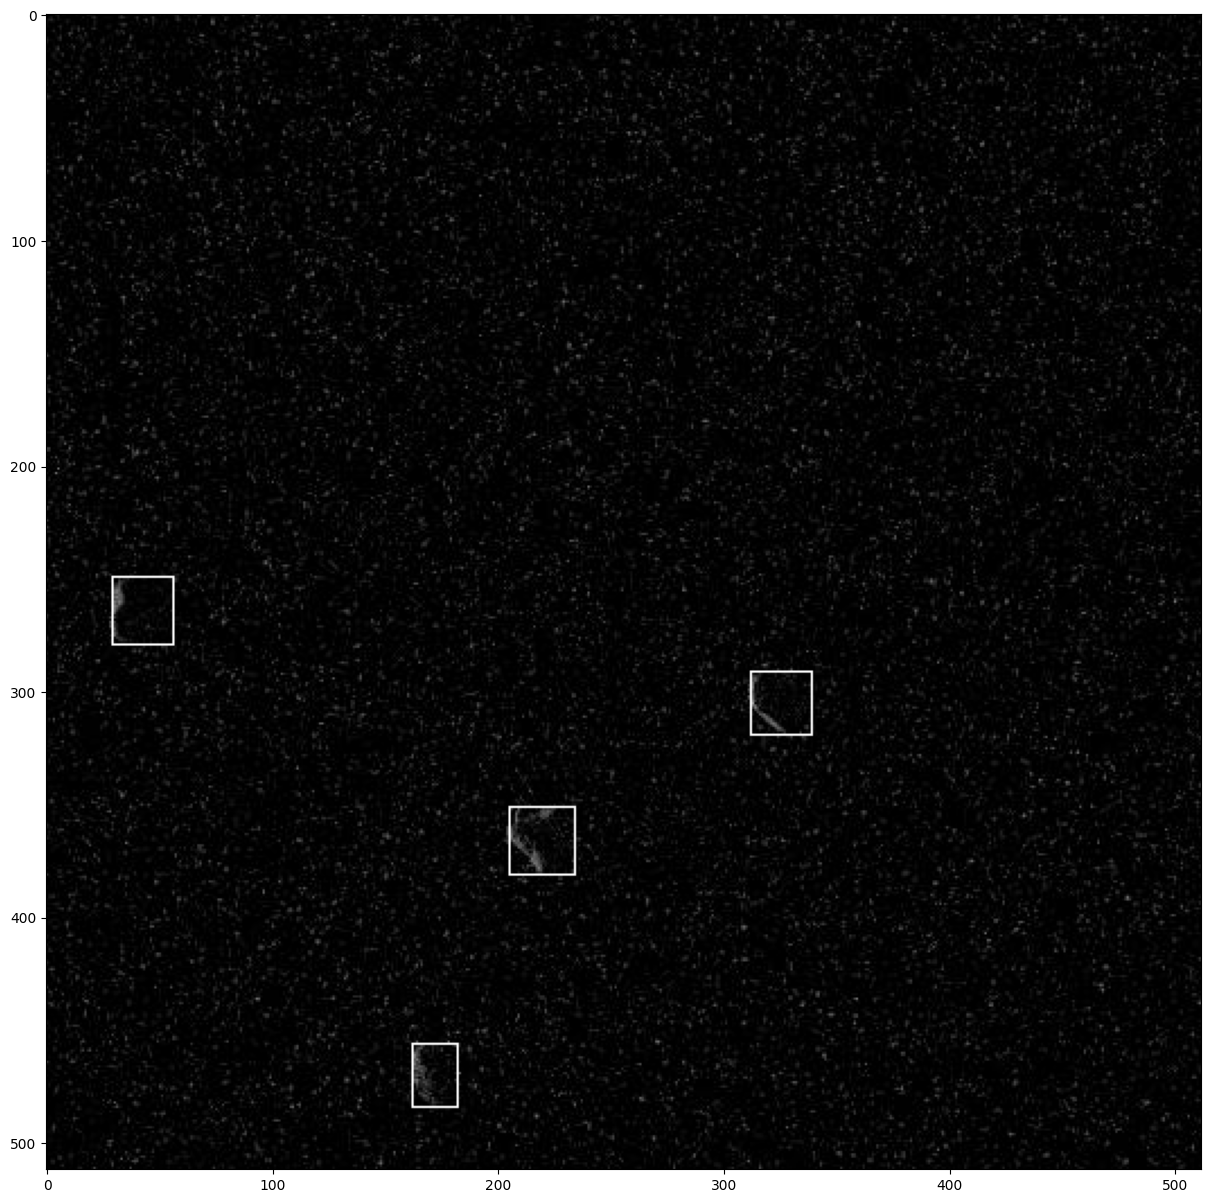

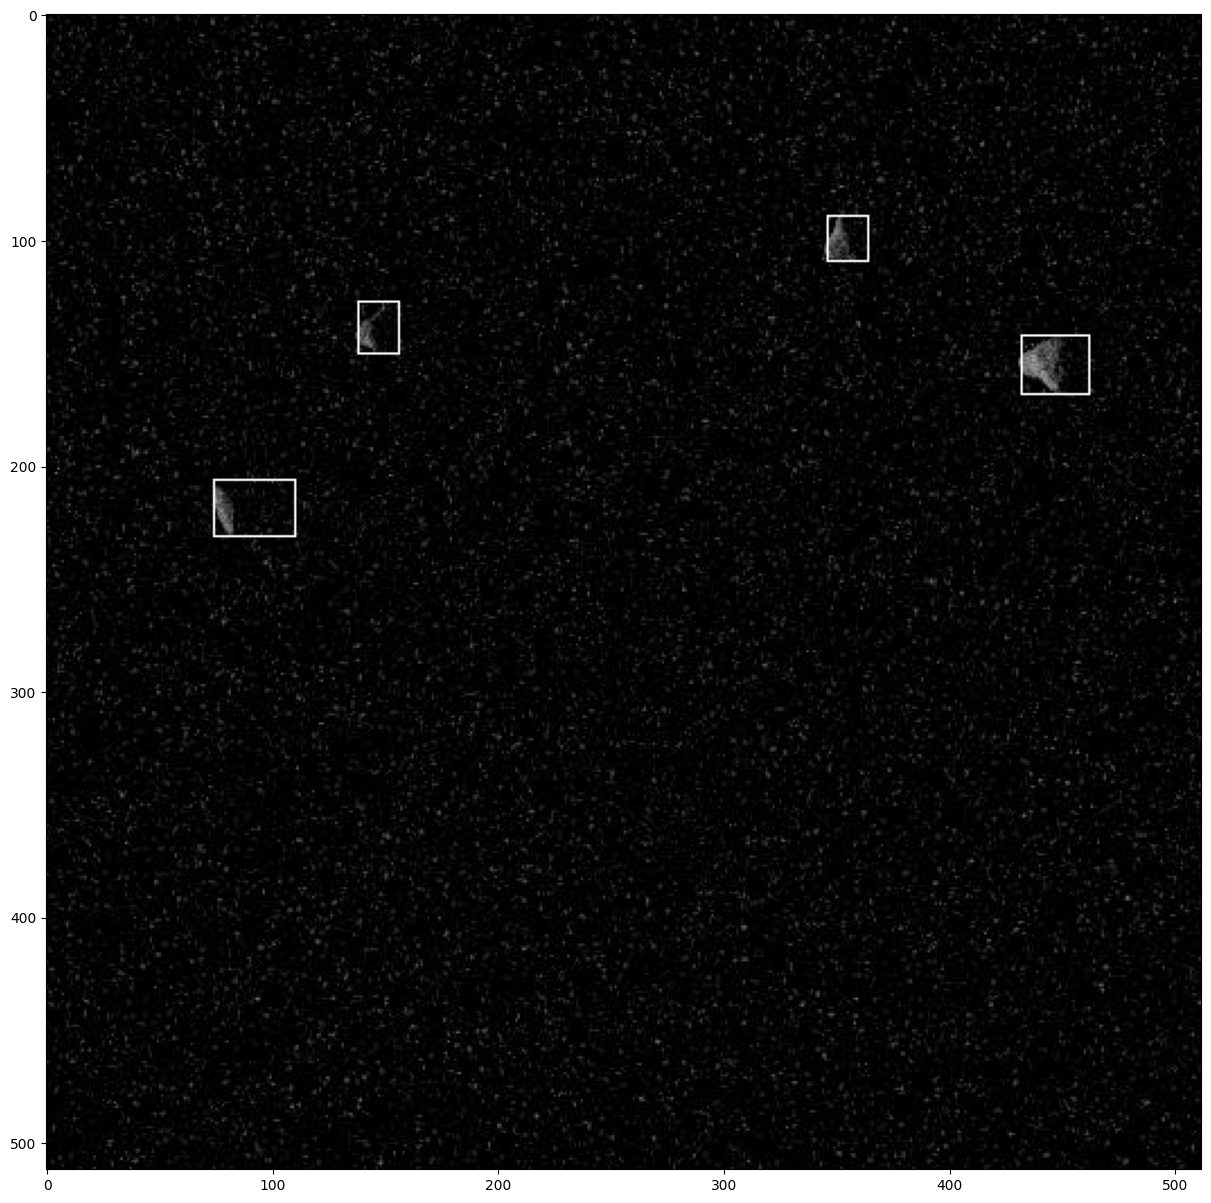

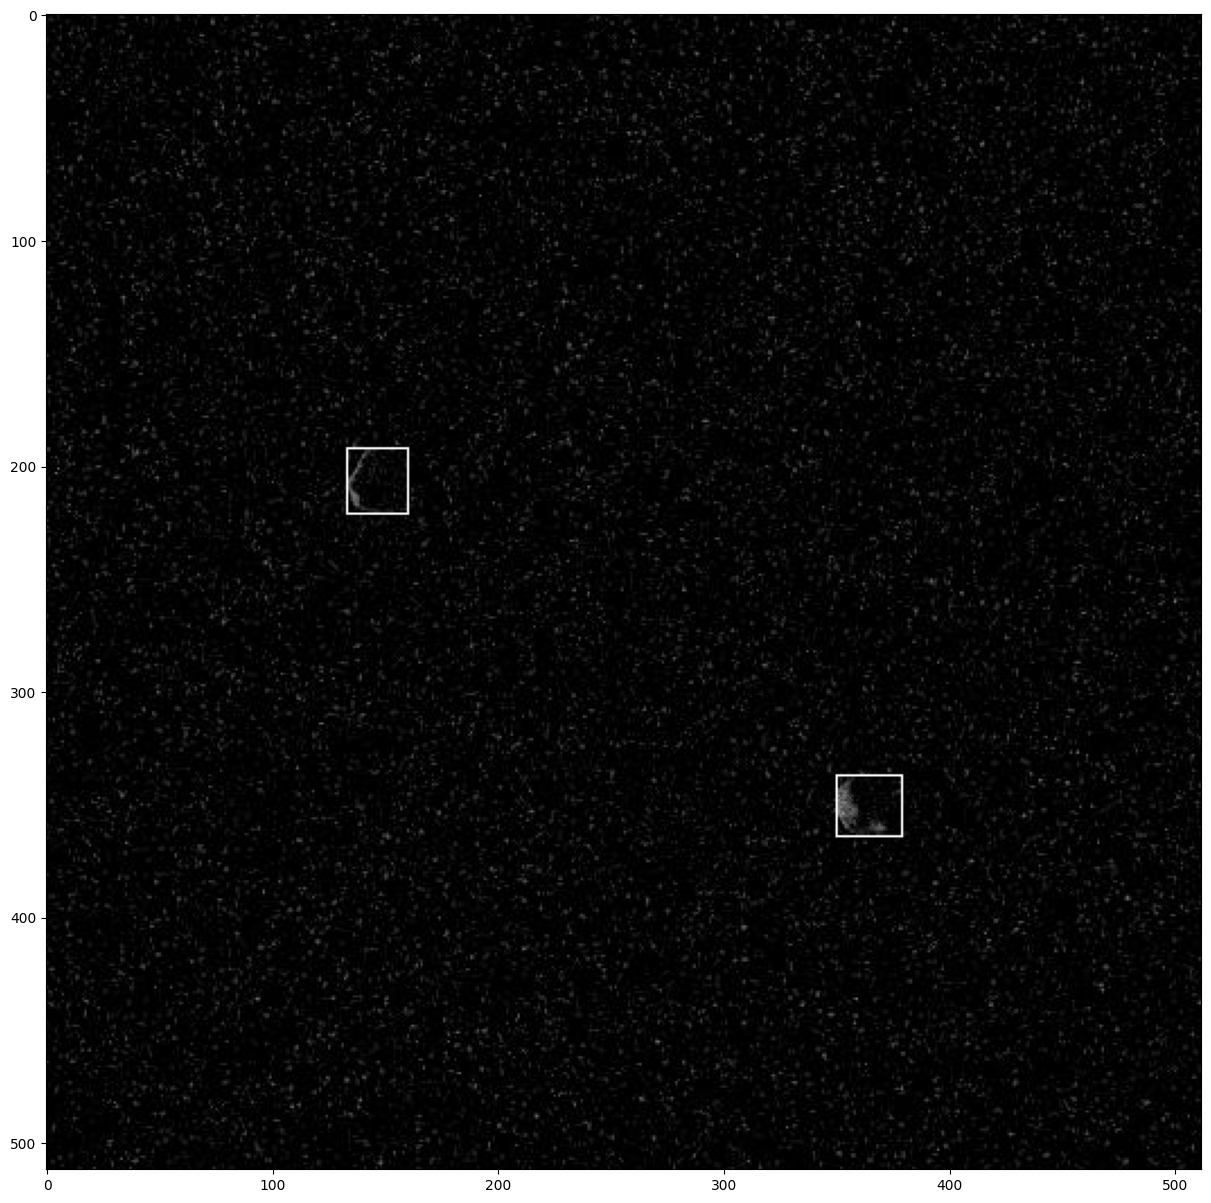

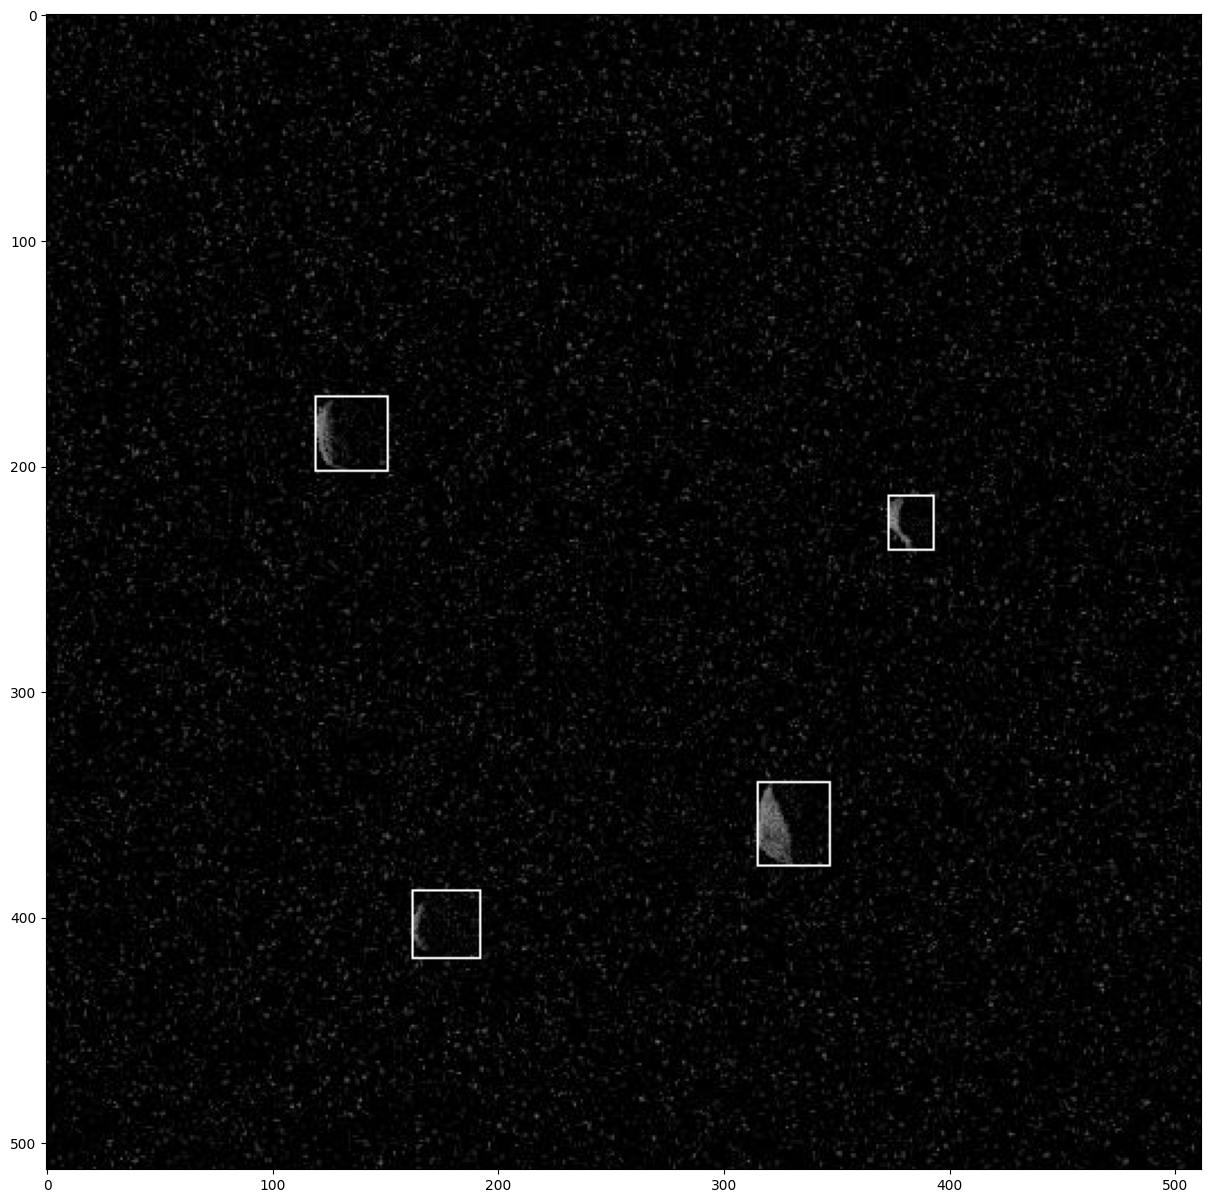

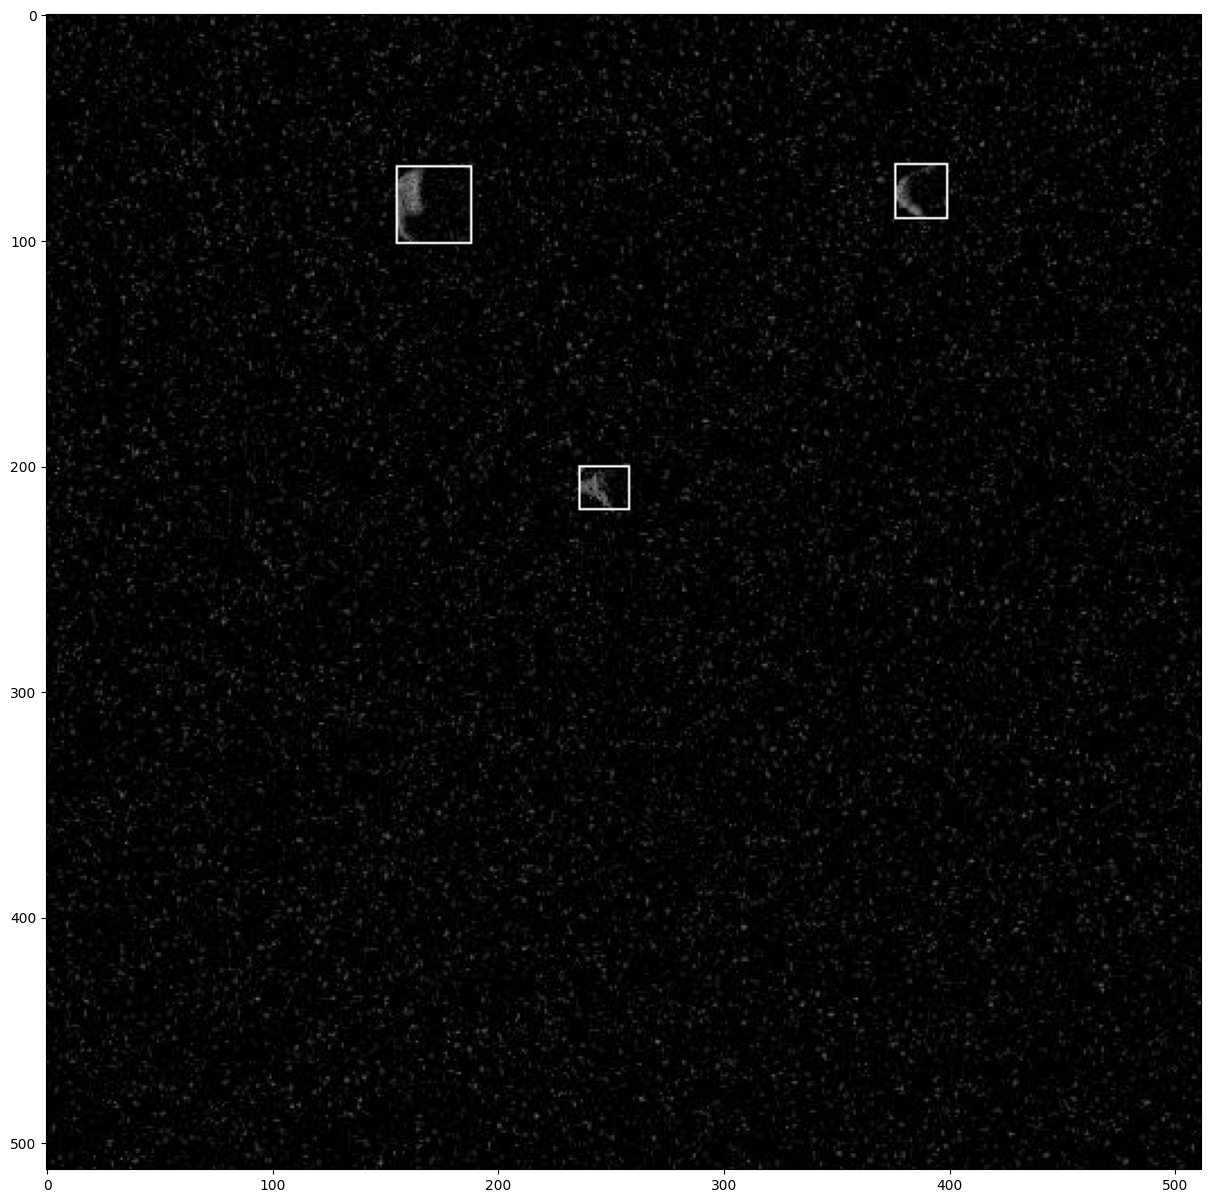

In [21]:
def show_images(images, num = 5):

    images_to_show = np.random.choice(images, num)

    for image_id in images_to_show:

        image = Image.open(os.path.join(data_path, f"train/{image_id}.jpg"))

        bboxes = literal_eval(train_df.loc[train_df['ImageID'] == image_id]['bboxes'].values[0])

        draw = ImageDraw.Draw(image)
        for bbox in bboxes:
            draw.rectangle([bbox[0], bbox[2], bbox[1], bbox[3]], width=1)

        plt.figure(figsize = (15,15))
        plt.imshow(image)
        plt.show()

show_images(train_df['ImageID'].unique(), num = 5)

# Creating Dataset

In [4]:
dict_dataset = []
def get_dataset_dics():

    for index, row in train_df.iterrows():

        image = Image.open(os.path.join(data_path, f"train/{row['ImageID']}.jpg"))
        w, h = image.size

        ann_lst = []

        bboxes = literal_eval(row['bboxes'])

        for n, bbox in enumerate(bboxes):

            ann_dict = {'bbox': [bbox[0], bbox[2], bbox[1], bbox[3]],
           'bbox_mode': BoxMode.XYXY_ABS,
           'category_id': 0, #i[1]['category_id'].values[0],
           'iscrowd': 0}

            ann_lst.append(ann_dict)

        image_dict = {'annotations': ann_lst,
            'file_name': os.path.join(data_path, f"train/{row['ImageID']}.jpg"),
            'height': h,
            'image_id': row["ImageID"], #i[1]['image_category_id'].values[0],
            'width': w}

        dict_dataset.append(image_dict)

    return dict_dataset

dict_dataset = get_dataset_dics()

In [5]:
d = f"debris_train{np.random.randint(10000)}"
DatasetCatalog.register(d, lambda d=d : get_dataset_dics())
MetadataCatalog.get(d).set(thing_classes=["Debris"])
obj_metadata = MetadataCatalog.get(d)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/matplotlib/m

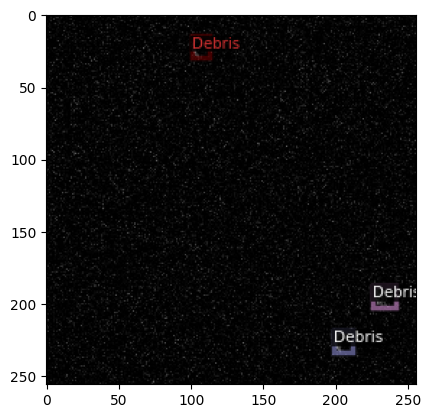

In [6]:
for i in random.sample(dict_dataset, 3):
    img = cv2.imread(i["file_name"])
    visualizer = Visualizer(img, metadata=obj_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(i)
    plt.imshow(out.get_image())

# Creating the Model

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml"))
cfg.DATASETS.TRAIN = (d,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 200
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
print(cfg)
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_SQRT: True
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ()
  TRAIN: ('debris_train7147',)
FLOAT32_PRECISION: 
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_backbone
  DEVICE: cpu
  FPN:
    FUSE_TYPE: sum
    IN_FEATURE

## Train the Model

In [39]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/02 13:06:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

[11/02 13:06:35 d2.engine.train_loop]: Starting training from iteration 0
[11/02 13:07:35 d2.utils.events]:  eta: 0:08:27  iter: 19  total_loss: 1.393  loss_cls: 0.7051  loss_box_reg: 0.6242  loss_rpn_cls: 0.03834  loss_rpn_loc: 0.009907    time: 2.8222  last_time: 2.4772  data_time: 0.1668  last_data_time: 0.0007   lr: 2.3976e-05  
[11/02 13:08:32 d2.utils.events]:  eta: 0:07:41  iter: 39  total_loss: 1.141  loss_cls: 0.4297  loss_box_reg: 0.6678  loss_rpn_cls: 0.02821  loss_rpn_loc: 0.009725    time: 2.8337  last_time: 2.8826  data_time: 0.0009  last_data_time: 0.0009   lr: 4.8951e-05  
[11/02 13:09:26 d2.utils.events]:  eta: 0:06:36  iter: 59  total_loss: 1.009  loss_cls: 0.2943  loss_box_reg: 0.6772  loss_rpn_cls: 0.02181  loss_rpn_loc: 0.01045    time: 2.7842  last_time: 2.3838  data_time: 0.0009  last_data_time: 0.0008   lr: 7.3926e-05  
[11/02 13:10:22 d2.utils.events]:  eta: 0:05:43  iter: 79  total_loss: 0.9014  loss_cls: 0.2149  loss_box_reg: 0.6671  loss_rpn_cls: 0.01008  lo

In [40]:
%load_ext tensorboard
%tensorboard --logdir output

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.# Prediction on Evaluation Set

## Loading Pretrained Model

In [8]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[11/09 12:27:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[Checkpointer] Loading from ./output/model_final.pth ...


/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [9]:
import timeit

test_imgs_paths = os.listdir(os.path.join(data_path, "test"))

predictions = {"ImageID":[], "bboxes":[]}
times = []

for test_img_path in test_imgs_paths[:10]:
  print(f"Processing {test_img_path}")

  img = cv2.imread(os.path.join(data_path, "test", test_img_path))
  h, w, _ = img.shape

  start = timeit.default_timer()
  model_predictions = predictor(img)
  stop = timeit.default_timer()

  times.append(stop - start)

  bboxes = model_predictions['instances'].pred_boxes.tensor.cpu().numpy().tolist()
  scores = model_predictions['instances'].scores.cpu().numpy().tolist()

  for n, bbox in enumerate(bboxes):

      bboxes[n] == bbox.append(scores[n])

  image_id = test_img_path.split('.')[0]

  predictions['ImageID'].append(image_id)
  predictions['bboxes'].append(bboxes)

print(f"Average inference time: {np.mean(times)}")
print("Times: ", times)

Processing 63.jpg


/Users/kylewigdor/Projects/CubeSat/.venv/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Processing 823.jpg
Processing 4217.jpg
Processing 3578.jpg
Processing 2666.jpg
Processing 2100.jpg
Processing 4571.jpg
Processing 1409.jpg
Processing 189.jpg
Processing 2114.jpg
Average inference time: 1.0968001374974847
Times:  [1.1228793339978438, 1.0892944170045666, 1.0821255419868976, 1.0600954160036054, 1.0669035000028089, 1.0979299170139711, 1.0877240829868242, 1.1845119159843307, 1.0746683329925872, 1.1018689170014113]


## Save the prediction to csv

In [49]:
submission = pd.DataFrame(predictions)
submission

ImageID                                             bboxes
0      63  [[447.84423828125, 101.99020385742188, 478.907...
1     823  [[324.49700927734375, 330.2501525878906, 350.0...
2    4217  [[430.8746643066406, 346.2465515136719, 452.66...
3    3578  [[404.1049499511719, 318.7111511230469, 437.79...
4    2666  [[108.20181274414062, 101.93670654296875, 137....
5    2100  [[455.95501708984375, 175.60877990722656, 482....
6    4571  [[449.9098205566406, 98.31926727294922, 471.22...
7    1409  [[266.6334228515625, 305.1750183105469, 290.85...
8     189  [[327.68115234375, 434.17730712890625, 352.127...
9    2114  [[266.3701477050781, 106.15090942382812, 288.5...

In [50]:
submission.to_csv("submission.csv", index=False)